In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:

x_train = [
    
[0.84, 0.99, 0.83, 0.99, 0.75, 0.67, 0.93, 0.82, 0.97],
[0.84, 0.99, 0.83, 0.99, 0.75, 0.68, 0.93, 0.82, 0.98],
[0.84, 0.99, 0.83, 0.99, 0.75, 0.68, 0.93, 0.82, 0.98],
[0.84, 0.99, 0.83, 0.99, 0.75, 0.68, 0.93, 0.82, 0.97],
[0.84, 0.99, 0.83, 0.99, 0.75, 0.68, 0.93, 0.82, 0.98],


]

y_train = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
]

x_train = np.array(x_train, dtype = np.float32)
y_train = np.array(y_train)

In [5]:
model = Sequential()

IN = x_train.shape[1]

HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN))
model.add(Dense(units=OUT, activation='linear')) #if possible use linear

model.compile(loss = 'mean_squared_error', optimizer=optimizers.SGD(lr=0.4))

In [6]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

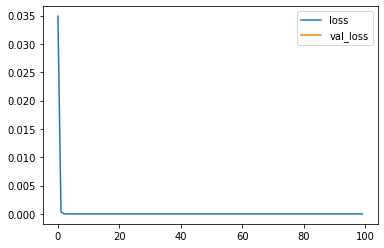

In [7]:
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=False, callbacks=[plot_losses])

In [8]:
predictions = model.predict(x_train).tolist()
for i, prediction in enumerate(predictions):
    print('model:\t', np.round(prediction,3))
    print('label:\t', y_train[i])
    print(' ')

1/1 [==============================] - 0s 51ms/step
model:	 [ 0.     0.    -0.001  0.     0.     0.    -0.001  0.001 -0.001]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0. -0.  0. -0.  0.  0.  0. -0.  0.]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0. -0.  0. -0.  0.  0.  0. -0.  0.]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.001  0.001  0.001 -0.    -0.001 -0.001  0.    -0.    -0.   ]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [-0. -0.  0. -0.  0.  0.  0. -0.  0.]
label:	 [0 0 0 0 0 0 0 0 0]
 


In [29]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [30]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in arduino code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print('// You also have to disable the initial weight randomization')
print('// you can find it under this section in the arduino code:')
print('//* Initialize HiddenWeights and ChangeHiddenWeights ')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in arduino code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


// You also have to disable the initial weight randomization
// you can find it under this section in the arduino code:
//* Initialize HiddenWeights and ChangeHiddenWeights 


float HiddenWeights[10][10] = {{-0.14004746079444885, -0.0341973640024662, 0.46974337100982666, 0.5358598828315735, 0.3270781636238098, 0.015218441374599934, -0.3996405601501465, 0.45910143852233887, 0.42852136492729187, -0.21932046115398407}, {-0.09146388620138168, -0.05158422514796257, 0.1604357361793518, 0.40996894240379333, -0.46762263774871826, 0.21628166735172272, -0.4508122205734253, 0.10921329259872437, 0.6199372410774231, 0.1858755648136139}, {-0.3137611448764801, -0.5920679569244385, 0.42592519521713257, 0.42010030150413513, -0.13474123179912567, -0.08814888447523117, -0.6996347308158875, -0.16631576418876648, 0.3817422091960907